In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import pickle
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.shape

(614, 13)

# Data Analysis

# checking for the information about tha data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


Obserrvation: Here we can see there are 8 object data type, 1 integer data type and 4 float data type data. And also there are missing values present in many columns. For specific we checking the null values.

In [6]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

# Handling missing values:

In [7]:
df['Gender']=df['Gender'].fillna(df['Gender'].mode()[0])
df['Married']=df['Married'].fillna(df['Married'].mode()[0])
df['Dependents']=df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed']=df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])
df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].median())
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median())
df['Credit_History']=df['Credit_History'].fillna(df['Credit_History'].median())

In [8]:
df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# Describe the data

In [9]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.752443,342.410423,0.855049
std,6109.041673,2926.248369,84.107233,64.428629,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,128.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


Observation: We can see there is big difference between 75% and max , means there must be outliers in data

In [10]:
# dropping unnecessary columns
df.drop(['Loan_ID'],axis=1,inplace=True)

In [11]:
df.shape

(614, 12)

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

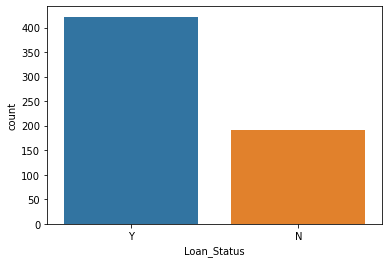

In [12]:
sns.countplot(df['Loan_Status'])

Observation: Data is imbalance, will deal with it later

# EDA

# Plotting the Heatmap:

<AxesSubplot:>

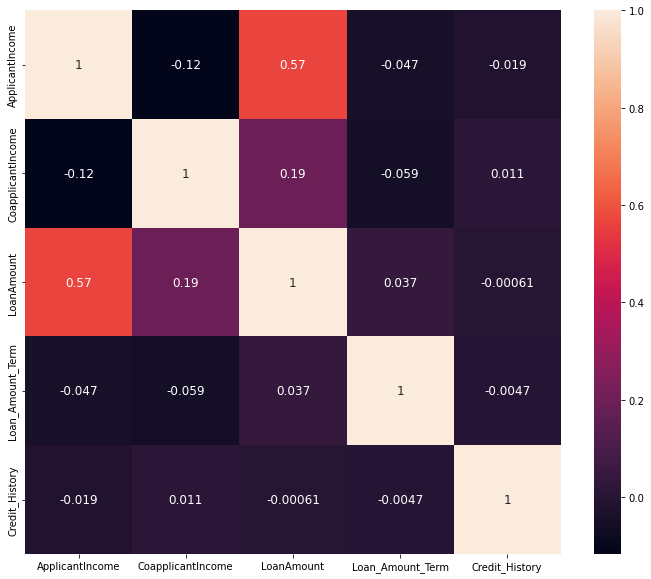

In [13]:
df_corr=df.corr()

plt.figure(figsize=(12,10))
sns.heatmap(df_corr,annot=True,annot_kws={'size':12})

Observation: 

    We can not notice LoanAmount is correlated with ApplicantIncome
    all the other featurs are negatively correlated with each other



In [14]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


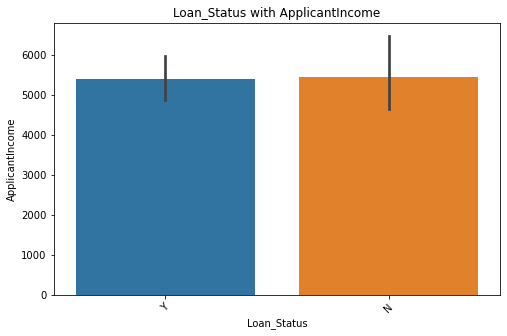

In [15]:
plt.figure(figsize=(8,5))
sns.barplot(y='ApplicantIncome',x='Loan_Status',data=df)
plt.title("Loan_Status with ApplicantIncome")
plt.xticks(rotation=45)
plt.show()

Observation: Chances are equal it doesn't matter with ApplicantIncome

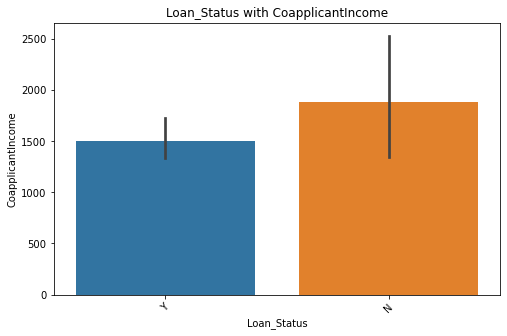

In [16]:
plt.figure(figsize=(8,5))
sns.barplot(y='CoapplicantIncome',x='Loan_Status',data=df)
plt.title("Loan_Status with CoapplicantIncome")
plt.xticks(rotation=45)
plt.show()

Observation: Here we notice some interesting figure there are chances not to be approved donts matter if CoapplicantIncome is high might be thats depends on all other figutres

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

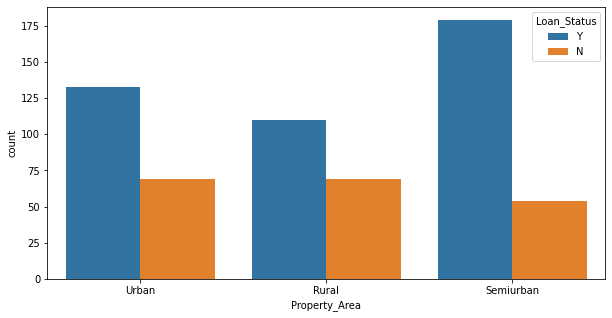

In [17]:
plt.figure(figsize=(10,5))
sns.countplot(x='Property_Area',hue='Loan_Status',data=df)

Observation: 

    People those are from Urban area having 50-50 chances of approval depends and other parameters as well
    In RuralProperty_area not approval chances are increasing
    In Semiurban area there are high chances to get approval



<AxesSubplot:xlabel='Credit_History', ylabel='count'>

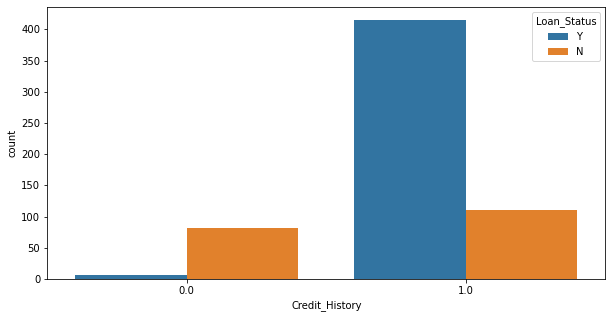

In [18]:
plt.figure(figsize=(10,5))
sns.countplot(x='Credit_History',hue='Loan_Status',data=df)

Observation: 

    Here we have the logical figure most of the people those are not getting approval, not having credit hsitory
    the people those having credit history, most of them getting approval



<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='count'>

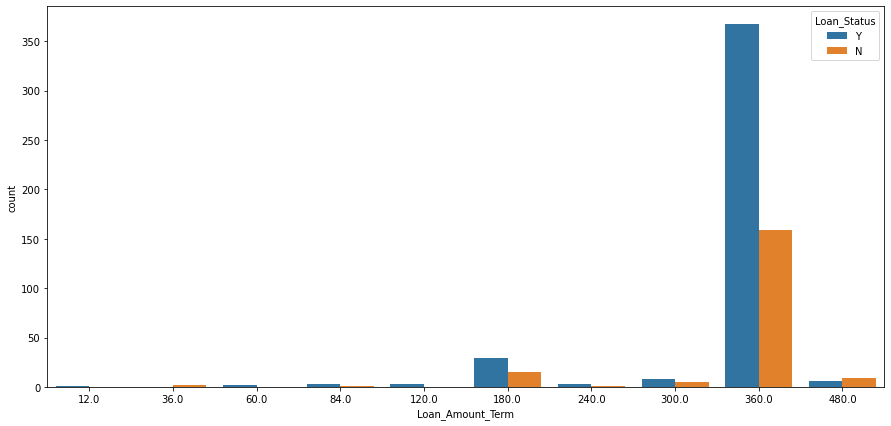

In [19]:
plt.figure(figsize=(15,7))
sns.countplot(x='Loan_Amount_Term',hue='Loan_Status',data=df)

Observation: 

    Most of the people who applied for loan asked for 360 months of term more half are getting approved
    People those are taking loan for 480 months, most of them are not getting approval



<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

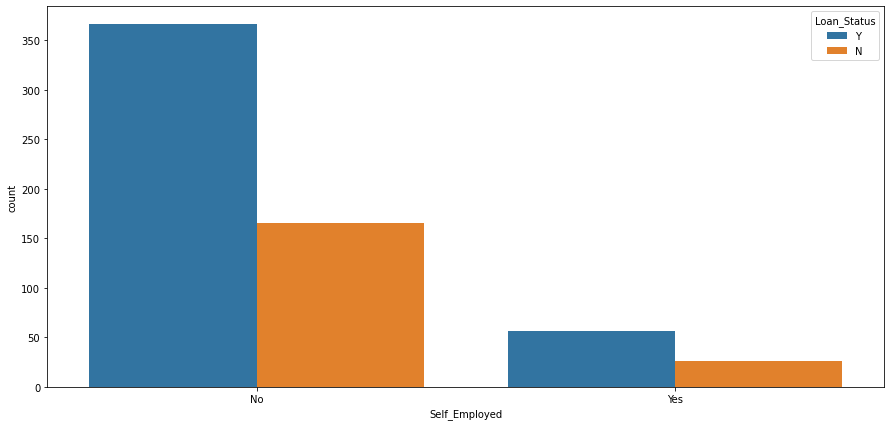

In [20]:
plt.figure(figsize=(15,7))
sns.countplot(x='Self_Employed',hue='Loan_Status',data=df)

Observation: 

    most of the data we have from not employed person

    Here we see if the person is not self employed there is high chances of approval
        There are more than 350 people are approved and more than 150 are not approved those are not self_employed

    In self_employed we see there around 50% of diffrence between approved and not approved people



<AxesSubplot:xlabel='Education', ylabel='count'>

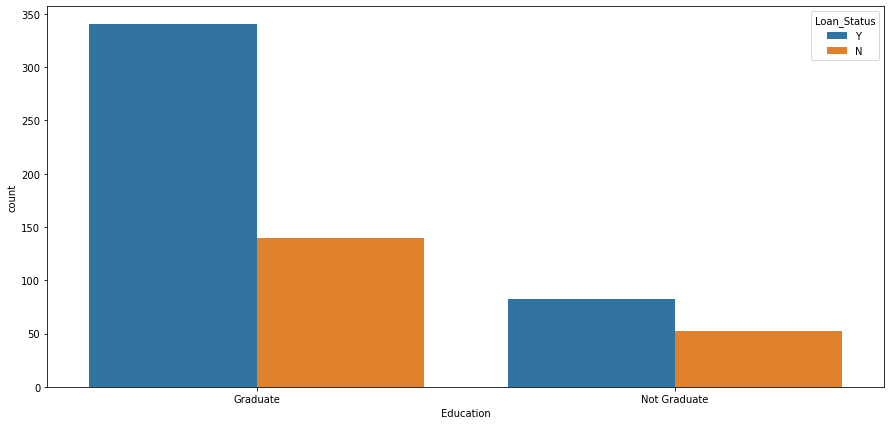

In [21]:
plt.figure(figsize=(15,7))
sns.countplot(x='Education',hue='Loan_Status',data=df)

Observation: 

    There are high chances of approval for Graduate people
        In Graduate categ. we have around 350 approved loan and around 150 not approved

    In other side we can notice of the person is not graduate difference is very less in approved and not approved category



<AxesSubplot:xlabel='Dependents', ylabel='count'>

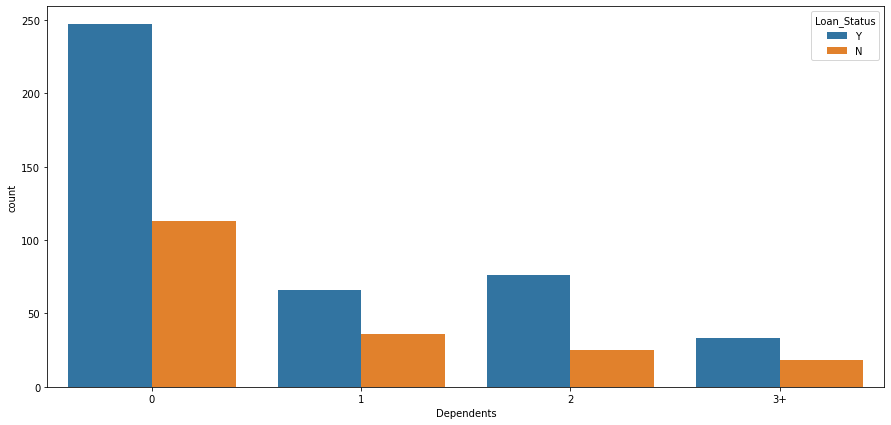

In [22]:
plt.figure(figsize=(15,7))
sns.countplot(x='Dependents',hue='Loan_Status',data=df)

Observation: 

    We can notice people those are not having dependents are getting chances of Loan approval
    when dependents numbers are 3+ there is less chances of approval



# Using LabelEncoder for convering categorical to numerical

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [24]:
from sklearn.preprocessing import LabelEncoder

In [25]:
labelencoder=LabelEncoder()
for column in df.columns:
    df[column] = labelencoder.fit_transform(df[column])

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Gender             614 non-null    int32
 1   Married            614 non-null    int32
 2   Dependents         614 non-null    int32
 3   Education          614 non-null    int32
 4   Self_Employed      614 non-null    int32
 5   ApplicantIncome    614 non-null    int64
 6   CoapplicantIncome  614 non-null    int64
 7   LoanAmount         614 non-null    int64
 8   Loan_Amount_Term   614 non-null    int64
 9   Credit_History     614 non-null    int64
 10  Property_Area      614 non-null    int32
 11  Loan_Status        614 non-null    int32
dtypes: int32(7), int64(5)
memory usage: 40.9 KB


Observation: All columns are converted into numerical now

# Skewness handling

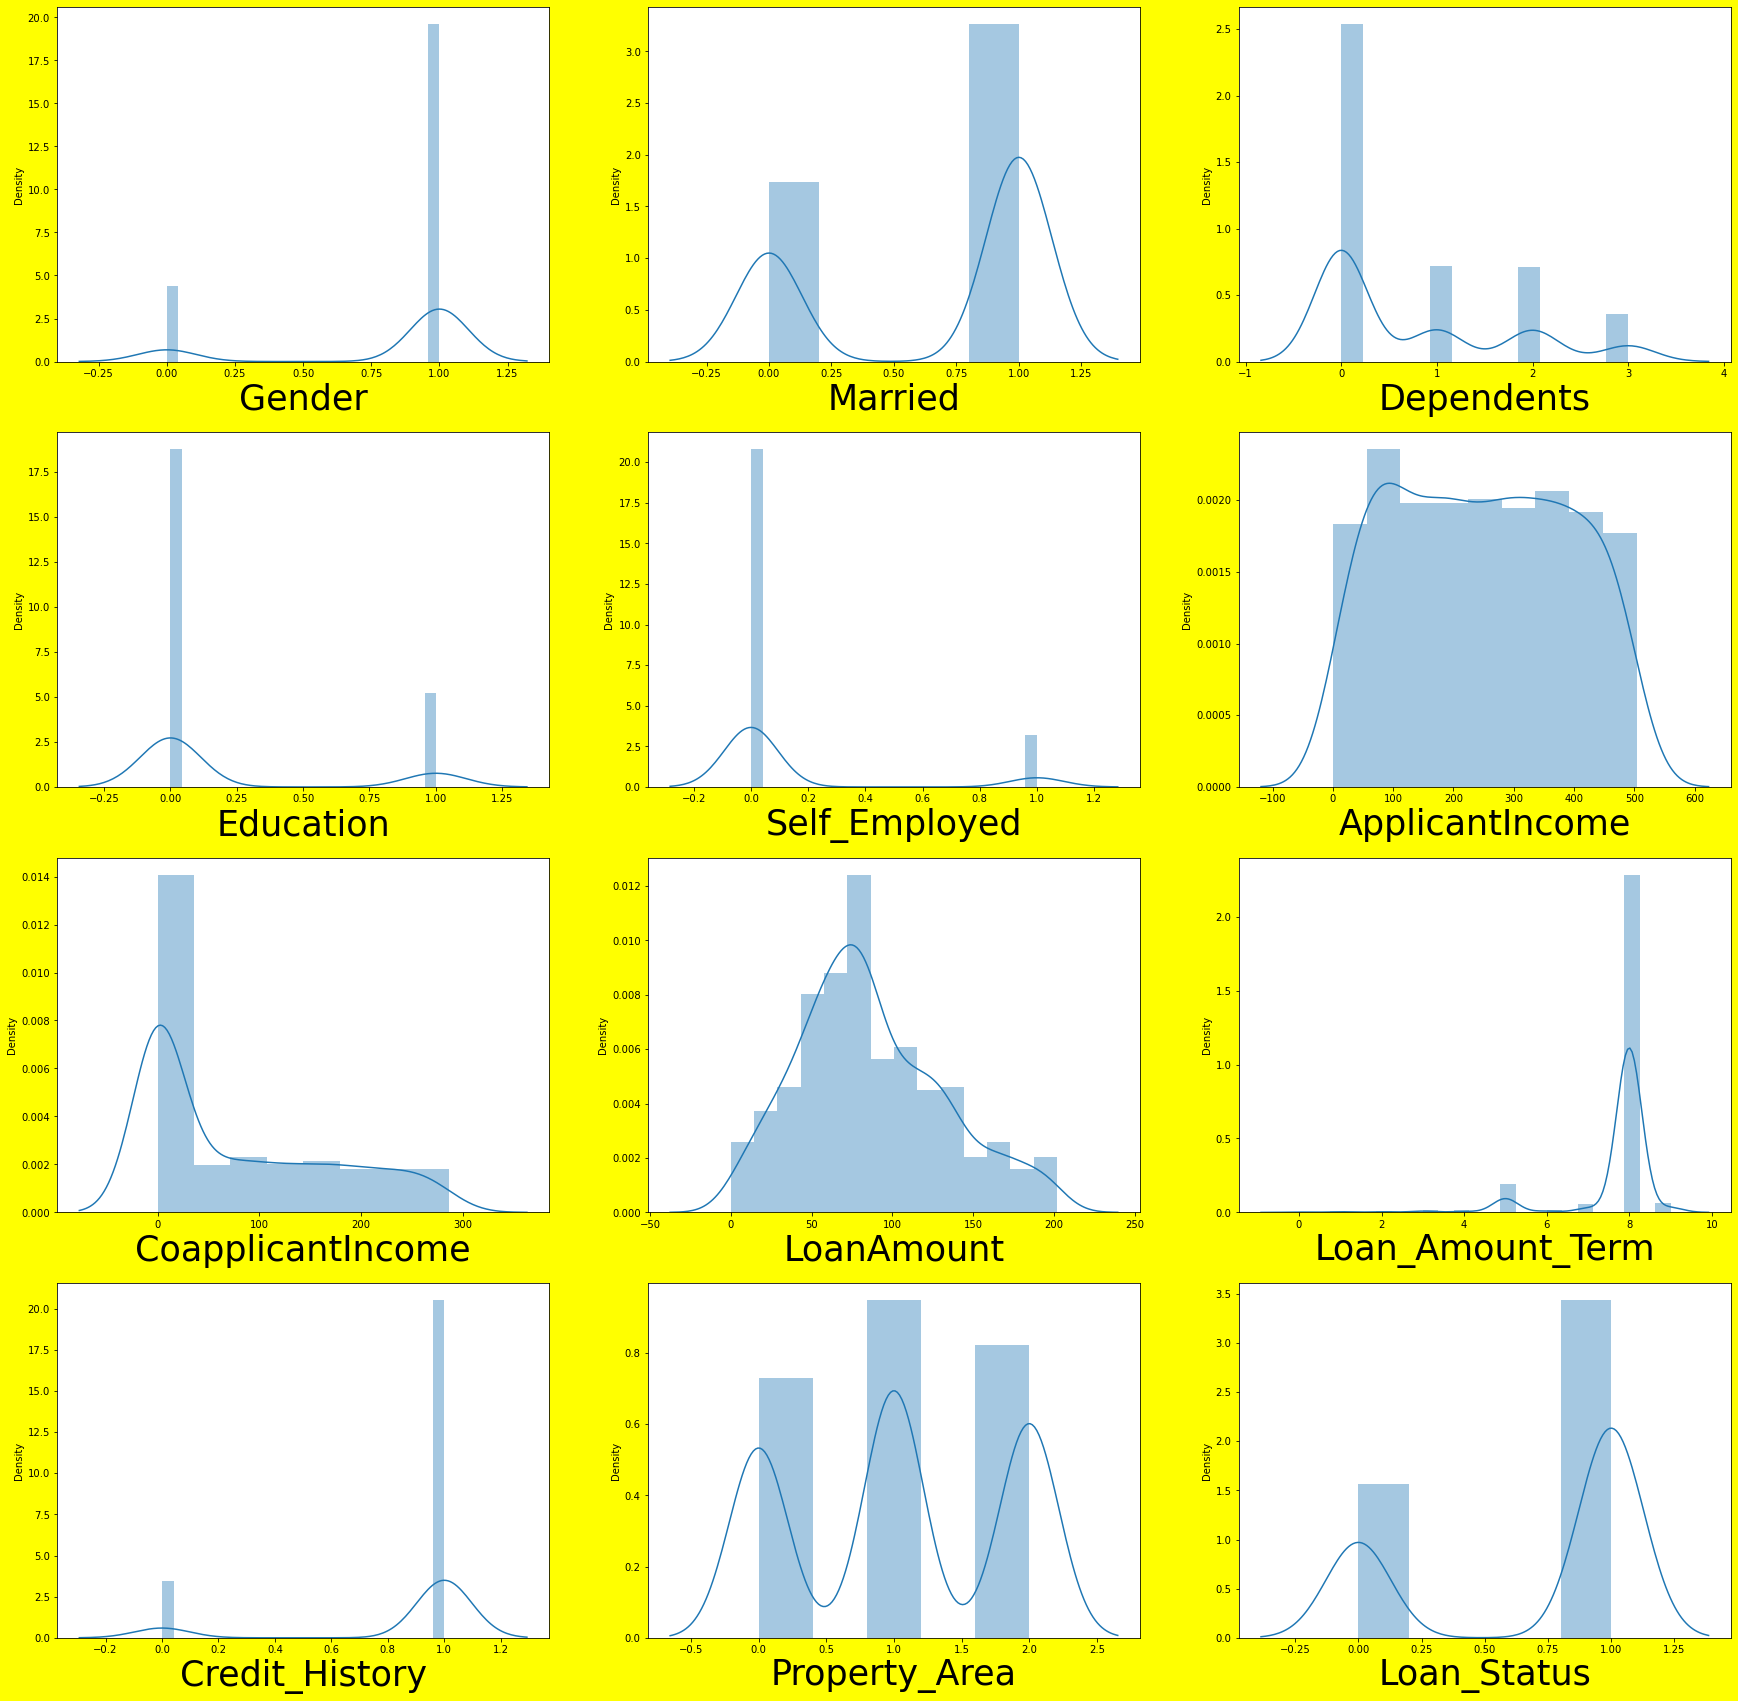

In [27]:
plt.figure(figsize=(30,30),facecolor='yellow')
plotnumber=1

for column in df:
    if plotnumber<=12:
        ax=plt.subplot(4,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=35)
        
        plotnumber+=1
plt.show()

In [28]:
df.skew()

Gender              -1.648795
Married             -0.644850
Dependents           1.015551
Education            1.367622
Self_Employed        2.159796
ApplicantIncome      0.040993
CoapplicantIncome    0.780870
LoanAmount           0.501334
Loan_Amount_Term    -3.316702
Credit_History      -2.021971
Property_Area       -0.066196
Loan_Status         -0.809998
dtype: float64

Observation: 
skewness more than+/- 0.5 will we treated
object and Target column will no be treated

we can see here most of the columns are skewed
will only deal with numercal columns

    CoapplicantIncome

will be treated


In [29]:
from sklearn.preprocessing import power_transform

df[['CoapplicantIncome']]=power_transform(df[['CoapplicantIncome']],method='yeo-johnson')

# Outliers Handling

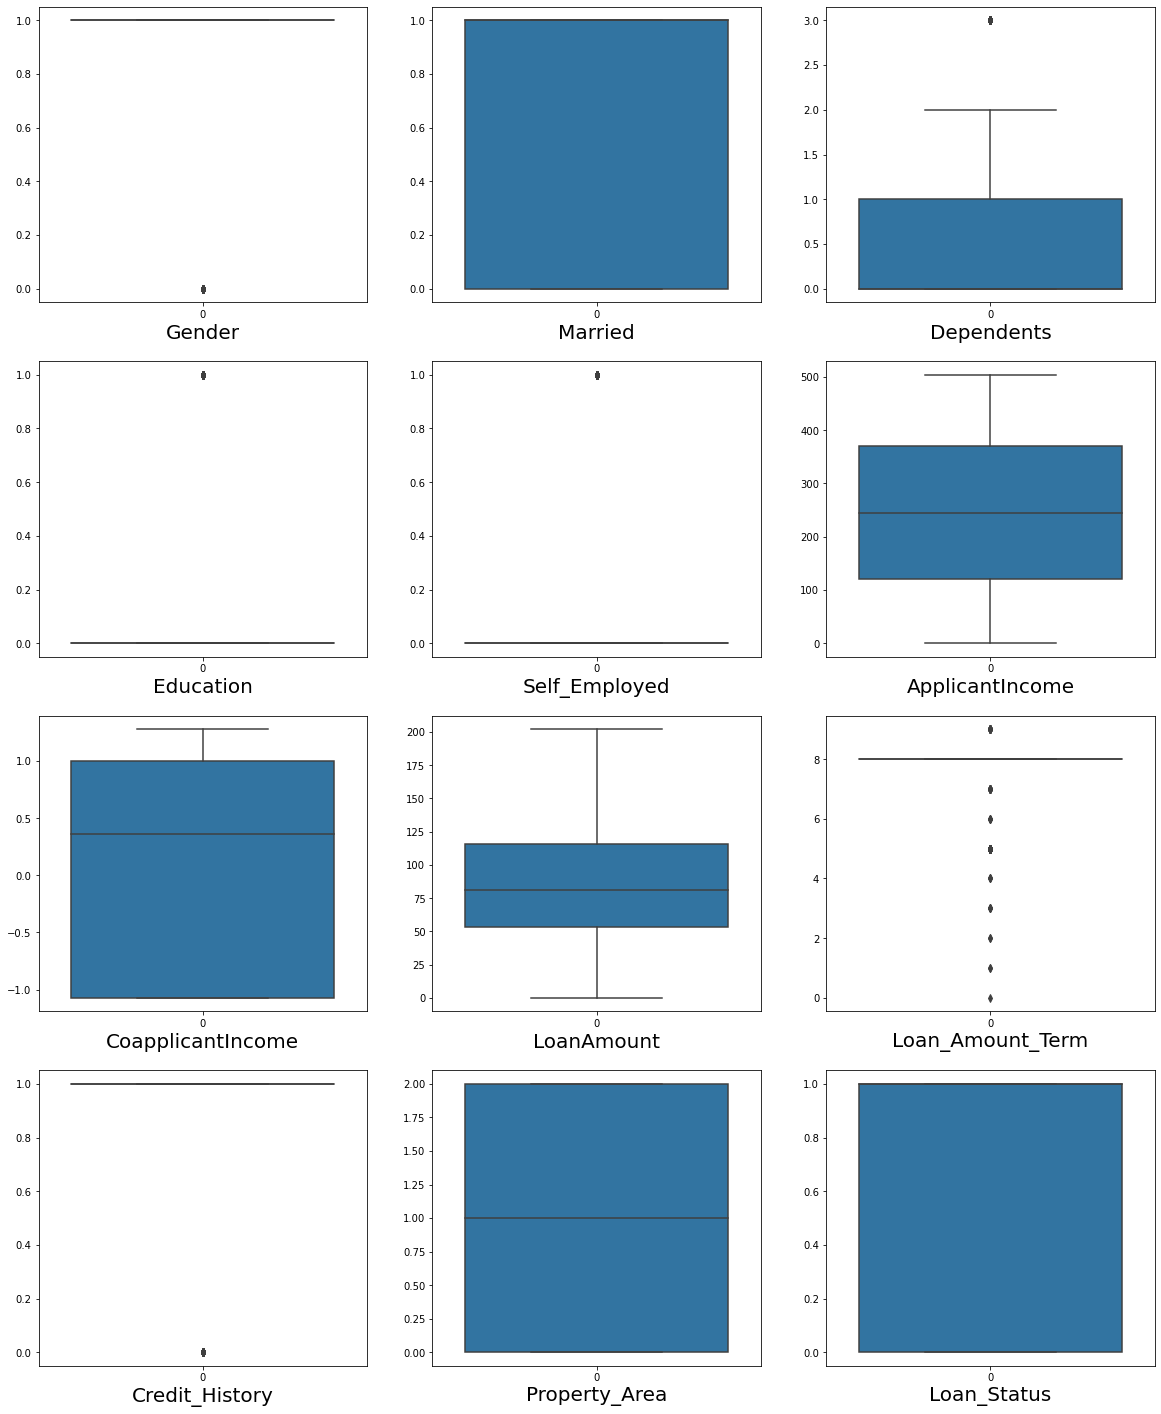

In [31]:
#Let's check for outliers
plt.figure(figsize=(20,25))
graph=1
for column in df:
    if graph<=12:
        ax=plt.subplot(4,3,graph)
        sns.boxplot(data=df[column])
        plt.xlabel(column,fontsize=20)
    graph+=1
plt.show()

Observation: Only some of columns seems having outliers after skewness removed .

# outliers removal

# ZSCORE METHOD:

In [32]:
from scipy.stats import zscore

z=np.abs(zscore(df))

print(np.where(z>3))

(array([ 14,  68,  94, 133, 242, 262, 313, 495, 497, 546, 575, 585],
      dtype=int64), array([8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8], dtype=int64))


In [33]:
df_1=df[(z<3).all(axis=1)]
print("with outliers::",df.shape)
print("After removing outliers::",df_1.shape)

with outliers:: (614, 12)
After removing outliers:: (602, 12)


Observation: Zscore removing 12 rows from data

# IQR

In [34]:
from scipy import stats 
IQR = stats.iqr(df) 
IQR 

3.0

In [35]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
df_out = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
print(df_out.shape)

(206, 12)


Observation: choosing ZSCORE because there is huge dataloss in IQR

In [36]:
df=df_1

# Dividing data into X and Y

In [37]:
x=df.drop(['Loan_Status'],axis=1)
y=df['Loan_Status']

In [38]:
x.shape

(602, 11)

In [39]:
y.shape

(602,)

# scaling X values

In [40]:
from sklearn.preprocessing import MinMaxScaler

sc=MinMaxScaler()
x=sc.fit_transform(x)

In [41]:
pd.DataFrame(x).isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
dtype: int64

In [42]:
pd.DataFrame(x).describe()

,0,1,2,3,4,5,6,7,8,9,10
count,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000
mean,0.817276,0.652824,0.246401,0.217608,0.131229,0.491220,0.458587,0.431713,0.692691,0.852159,0.516611
std,0.386762,0.476468,0.336385,0.412963,0.337932,0.286063,0.426122,0.223551,0.206076,0.355237,0.394078
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.234623,0.000000,0.268564,0.750000,1.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,0.489087,0.623274,0.400990,0.750000,1.000000,0.500000
75%,1.000000,1.000000,0.333333,0.000000,0.000000,0.737599,0.883545,0.574257,0.750000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Observation: data have been scalled

# Imbalanced learn

Using OverSamling_BorderlineSMOTE

    because there is less data in Loan_Status for yes


<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

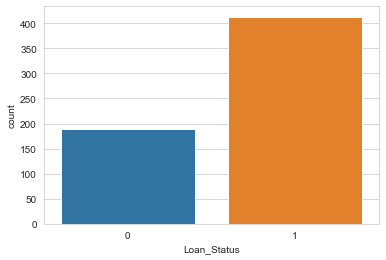

In [43]:
sns.set_style("whitegrid")
sns.countplot(x="Loan_Status", data=df)

Observation: 

    We can see here Data is not fully balance but we'll treat the imbalace.
    we have around 200 in yes and around 400 in no.



In [44]:
from imblearn.over_sampling import BorderlineSMOTE
x_rus, y_rus =BorderlineSMOTE().fit_resample(x, y)
print('original  Target dataset shape:',y.shape)
print('Resample Target dataset shape',y_rus.shape)

original  Target dataset shape: (602,)
Resample Target dataset shape (826,)


<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

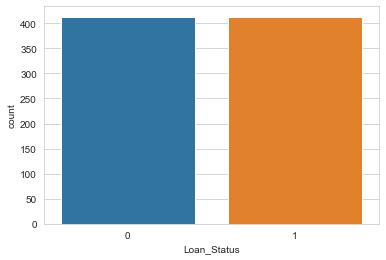

In [45]:
sns.set_style("whitegrid")
sns.countplot(y_rus)

Observation: Now we have balaced data for model training

# Spliting Train and Test data

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
from sklearn.metrics import confusion_matrix,classification_report,roc_curve,roc_auc_score,accuracy_score

In [48]:
from sklearn.linear_model import LogisticRegression

LR=LogisticRegression()

for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x_rus,y_rus,test_size=0.25,random_state=i)
    LR.fit(x_train,y_train)
    LR_predict_test=LR.predict(x_test)
    print(f'At random state {i}, The training accuracy is:-{LR.score(x_train,y_train)}')
    print(f'At random state {i}, The test accuracy is:-{accuracy_score(y_test,LR_predict_test)}')

At random state 0, The training accuracy is:-0.6655896607431341
At random state 0, The test accuracy is:-0.6376811594202898
At random state 1, The training accuracy is:-0.617124394184168
At random state 1, The test accuracy is:-0.6956521739130435
At random state 2, The training accuracy is:-0.6494345718901454
At random state 2, The test accuracy is:-0.6521739130434783
At random state 3, The training accuracy is:-0.6688206785137318
At random state 3, The test accuracy is:-0.5652173913043478
At random state 4, The training accuracy is:-0.6445880452342488
At random state 4, The test accuracy is:-0.5990338164251208
At random state 5, The training accuracy is:-0.6655896607431341
At random state 5, The test accuracy is:-0.6183574879227053
At random state 6, The training accuracy is:-0.6397415185783522
At random state 6, The test accuracy is:-0.642512077294686
At random state 7, The training accuracy is:-0.6575121163166397
At random state 7, The test accuracy is:-0.6183574879227053
At random 

Observation: At random state 17 giving highest accuracy of 0.69. so we are choosing that as random state

# splitting the data:

In [49]:
x_train,x_test,y_train,y_test=train_test_split(x_rus,y_rus,test_size=0.25,random_state=17)

In [50]:
x_train.shape

(619, 11)

In [51]:
y_train.shape

(619,)

In [52]:
x_test.shape

(207, 11)

In [53]:
y_test.shape

(207,)

# Model Building:

# Logistic Regression:

In [54]:
from sklearn.linear_model import LogisticRegression

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV,cross_val_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [55]:
logreg=LogisticRegression()
logreg_score=cross_val_score(logreg,x_rus,y_rus,cv=5,scoring='accuracy')
print("cross validation score:",np.mean(logreg_score))

cross validation score: 0.6403431909456007


In [56]:
logreg.fit(x_train,y_train)
LR_predicted=logreg.predict(x_test)

print(accuracy_score(y_test,LR_predicted))
print(confusion_matrix(y_test,LR_predicted))
print(classification_report(y_test,LR_predicted))
print("Training accuracy::",logreg.score(x_train,y_train))
print("Test accuracy::",logreg.score(x_test,y_test))

0.6956521739130435
[[67 36]
 [27 77]]
              precision    recall  f1-score   support

           0       0.71      0.65      0.68       103
           1       0.68      0.74      0.71       104

    accuracy                           0.70       207
   macro avg       0.70      0.70      0.69       207
weighted avg       0.70      0.70      0.70       207

Training accuracy:: 0.6591276252019386
Test accuracy:: 0.6956521739130435


# DECISION TREE CLASSIFIER

In [57]:
dtc=DecisionTreeClassifier()
dtc_score=cross_val_score(dtc,x_rus,y_rus,cv=5,scoring='accuracy')
print("cross validation score for svm:",np.mean(dtc_score))

cross validation score for svm: 0.7410441767068272


In [58]:
dtc.fit(x_train,y_train)
predicted_dtc=dtc.predict(x_test)
print(accuracy_score(y_test,predicted_dtc))
print(confusion_matrix(y_test,predicted_dtc))
print(classification_report(y_test,predicted_dtc))
print("Training accuracy::",dtc.score(x_train,y_train))
print("Test accuracy::",dtc.score(x_test,y_test))

0.748792270531401
[[79 24]
 [28 76]]
              precision    recall  f1-score   support

           0       0.74      0.77      0.75       103
           1       0.76      0.73      0.75       104

    accuracy                           0.75       207
   macro avg       0.75      0.75      0.75       207
weighted avg       0.75      0.75      0.75       207

Training accuracy:: 1.0
Test accuracy:: 0.748792270531401


# KNeighborsClassifier:

In [59]:
knn=KNeighborsClassifier()
knn_score=cross_val_score(knn,x_rus,y_rus,cv=5,scoring='accuracy')
print("cross validation score for knn:",np.mean(knn_score))

cross validation score for knn: 0.7312157721796277


In [60]:
knn.fit(x_train,y_train)
predicted_knn=knn.predict(x_test)
print(accuracy_score(y_test,predicted_knn))
print(confusion_matrix(y_test,predicted_knn))
print(classification_report(y_test,predicted_knn))
print("Training accuracy::",knn.score(x_train,y_train))
print("Test accuracy::",knn.score(x_test,y_test))

0.6908212560386473
[[78 25]
 [39 65]]
              precision    recall  f1-score   support

           0       0.67      0.76      0.71       103
           1       0.72      0.62      0.67       104

    accuracy                           0.69       207
   macro avg       0.69      0.69      0.69       207
weighted avg       0.69      0.69      0.69       207

Training accuracy:: 0.8384491114701131
Test accuracy:: 0.6908212560386473


# RandomForestClassifier:

In [61]:
rfc=RandomForestClassifier()
rfc_score=cross_val_score(rfc,x_rus,y_rus,cv=5,scoring='accuracy')
print("cross validation score for rfc:",np.mean(rfc_score))

cross validation score for rfc: 0.8160204454180358


In [62]:
rfc.fit(x_train,y_train)
predicted_rfc=rfc.predict(x_test)
print(accuracy_score(y_test,predicted_rfc))
print(confusion_matrix(y_test,predicted_rfc))
print(classification_report(y_test,predicted_rfc))
print("Training accuracy::",rfc.score(x_train,y_train))
print("Test accuracy::",rfc.score(x_test,y_test))

0.8309178743961353
[[90 13]
 [22 82]]
              precision    recall  f1-score   support

           0       0.80      0.87      0.84       103
           1       0.86      0.79      0.82       104

    accuracy                           0.83       207
   macro avg       0.83      0.83      0.83       207
weighted avg       0.83      0.83      0.83       207

Training accuracy:: 1.0
Test accuracy:: 0.8309178743961353


# ENSEMBLE TECHNIQUES

# 1.ADA BOOST CLASSIFIER

In [63]:
adb=AdaBoostClassifier()
adb_score=cross_val_score(adb,x_rus,y_rus,cv=10,scoring='accuracy')
print("cross validation score for Ada boost:",np.mean(adb_score))

cross validation score for Ada boost: 0.7519100793417574


In [64]:
adb.fit(x_train,y_train)
predicted_adb=adb.predict(x_test)
print(accuracy_score(y_test,predicted_adb))
print(confusion_matrix(y_test,predicted_adb))
print(classification_report(y_test,predicted_adb))
print("Training accuracy::",adb.score(x_train,y_train))
print("Test accuracy::",adb.score(x_test,y_test))

0.821256038647343
[[80 23]
 [14 90]]
              precision    recall  f1-score   support

           0       0.85      0.78      0.81       103
           1       0.80      0.87      0.83       104

    accuracy                           0.82       207
   macro avg       0.82      0.82      0.82       207
weighted avg       0.82      0.82      0.82       207

Training accuracy:: 0.7835218093699515
Test accuracy:: 0.821256038647343


# 2. Gradient Boosting classifier

In [65]:
grbc=GradientBoostingClassifier()
grbc_score=cross_val_score(grbc,x_rus,y_rus,cv=10,scoring='accuracy')
print("cross validation score for Gradient Boosting Classifier:",np.mean(grbc_score))

cross validation score for Gradient Boosting Classifier: 0.7579929473993535


In [67]:
grbc.fit(x_train,y_train)
predicted_grbc=grbc.predict(x_test)
print(accuracy_score(y_test,predicted_grbc))
print(confusion_matrix(y_test,predicted_grbc))
print(classification_report(y_test,predicted_grbc))
print("Training accuracy::",grbc.score(x_train,y_train))
print("Test accuracy::",accuracy_score(y_test,predicted_grbc))

0.782608695652174
[[77 26]
 [19 85]]
              precision    recall  f1-score   support

           0       0.80      0.75      0.77       103
           1       0.77      0.82      0.79       104

    accuracy                           0.78       207
   macro avg       0.78      0.78      0.78       207
weighted avg       0.78      0.78      0.78       207

Training accuracy:: 0.9063004846526656
Test accuracy:: 0.782608695652174


# plotting roc curve:

plotting for training score for different models:

In [68]:
from sklearn.metrics import roc_curve,roc_auc_score,plot_roc_curve

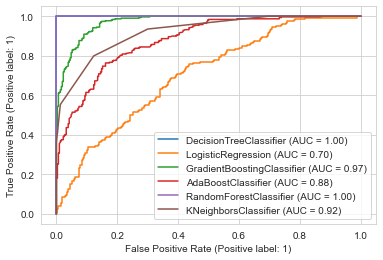

In [69]:
disp=plot_roc_curve(dtc,x_train,y_train)

plot_roc_curve(logreg,x_train,y_train,ax=disp.ax_)

plot_roc_curve(grbc,x_train,y_train,ax=disp.ax_)

plot_roc_curve(adb,x_train,y_train,ax=disp.ax_)

plot_roc_curve(rfc,x_train,y_train,ax=disp.ax_)

plot_roc_curve(knn,x_train,y_train,ax=disp.ax_)

plt.legend(prop={'size':10},loc='lower right')

plt.show()

plotting for testing score for different models:

<Figure size 2160x2160 with 0 Axes>

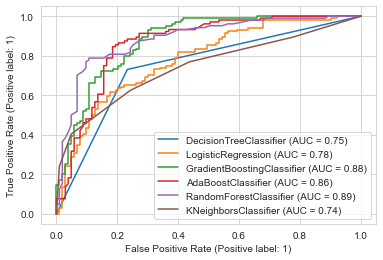

In [70]:
plt.figure(figsize=(30,30))
disp=plot_roc_curve(dtc,x_test,y_test)

plot_roc_curve(logreg,x_test,y_test,ax=disp.ax_)

plot_roc_curve(grbc,x_test,y_test,ax=disp.ax_)

plot_roc_curve(adb,x_test,y_test,ax=disp.ax_)

plot_roc_curve(rfc,x_test,y_test,ax=disp.ax_)

plot_roc_curve(knn,x_test,y_test,ax=disp.ax_)

plt.legend(prop={'size':10},loc='lower right')

plt.show()

# Conclusion:

# Choosing Random Forest Classifier Classifier as our best model beacuse the difference between training cross validation score and testing score is very less as compare to other model. And the testing score is also very high in Random Forest Classifier.


# Hence, This is our best model

# HYPER PARAMETER TUNING:

In [71]:
rfc=RandomForestClassifier()
param_grid={
    'criterion' : ["gini", "entropy"],
    'n_estimators':[200,1000,50],
    'min_samples_split':[2,3,4],
     'random_state':[10]              
}

In [72]:
gridsearch=GridSearchCV(estimator=rfc,param_grid=param_grid,cv=5,n_jobs=-1)

In [73]:
gridsearch.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [200, 1000, 50],
                         'random_state': [10]})

In [74]:
gridsearch.best_params_

{'criterion': 'gini',
 'min_samples_split': 4,
 'n_estimators': 1000,
 'random_state': 10}

In [75]:
rfc=gridsearch.best_estimator_
rfc.fit(x_train,y_train)

RandomForestClassifier(min_samples_split=4, n_estimators=1000, random_state=10)

In [76]:
print(rfc.score(x_train,y_train))
predicted_rfc=rfc.predict(x_test)

0.9967689822294022


In [77]:
rfc_score=cross_val_score(rfc,x_rus,y_rus,cv=5,scoring='accuracy')
print("cross validation score for rfc:",np.mean(rfc_score))

cross validation score for rfc: 0.8233077765607886


In [78]:
rfc.fit(x_train,y_train)
predicted_rfc=rfc.predict(x_test)
print(accuracy_score(y_test,predicted_rfc))
print(confusion_matrix(y_test,predicted_rfc))
print(classification_report(y_test,predicted_rfc))
print("Training accuracy::",rfc.score(x_train,y_train))
print("Test accuracy::",rfc.score(x_test,y_test))

0.8067632850241546
[[83 20]
 [20 84]]
              precision    recall  f1-score   support

           0       0.81      0.81      0.81       103
           1       0.81      0.81      0.81       104

    accuracy                           0.81       207
   macro avg       0.81      0.81      0.81       207
weighted avg       0.81      0.81      0.81       207

Training accuracy:: 0.9967689822294022
Test accuracy:: 0.8067632850241546


# Report of RandomForestClassifier

In [79]:
print("CLASSIFICATION REPORT::\n",classification_report(y_test,predicted_rfc))

CLASSIFICATION REPORT::
               precision    recall  f1-score   support

           0       0.81      0.81      0.81       103
           1       0.81      0.81      0.81       104

    accuracy                           0.81       207
   macro avg       0.81      0.81      0.81       207
weighted avg       0.81      0.81      0.81       207



<AxesSubplot:>

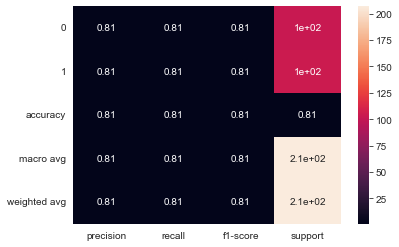

In [80]:
clsf_repo = classification_report(y_test,predicted_rfc,output_dict=True)
sns.heatmap(pd.DataFrame(clsf_repo).T, annot=True)

In [81]:
print("roc auc score::",roc_auc_score(y_test,predicted_rfc))

roc auc score:: 0.8067587752053771


In [82]:
fpr1, tpr1, thresh1 = roc_curve(y_test,predicted_rfc, pos_label=1)

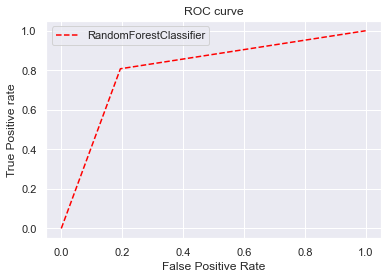

In [83]:
#plotting ROC CURVE
sns.set_theme(style="darkgrid")
plt.plot(fpr1, tpr1, linestyle='--',color='red', label='RandomForestClassifier')

plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')

# Saving Model:

In [85]:
import pickle
filename='Loan_Application_Status_project.pkl'
pickle.dump(rfc,open(filename,'wb'))

# Conclusion:

In [86]:
loaded_model=pickle.load(open('Loan_Application_Status_project.pkl','rb'))
result=loaded_model.score(x_test,y_test)
print(result*100)

80.67632850241546
